In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [8]:
from scipy import stats

# Load the data
msavi_df = pd.read_csv("lucas_soil_MSAVI2_new8_postive.csv")

df = pd.read_csv("vegetation_data.csv")
# Calculate z-scores for the "N" attribute
z_scores = stats.zscore(df["N"])

# Define a threshold for outlier detection
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]




indices_to_drop = [37, 131, 162, 143, 175]
indices_to_drop = [index for index in indices_to_drop if index in df.index]
df = df.drop(indices_to_drop, axis=0)
df = df.reset_index(drop=True)



# set up high and low Nitrogen
for i in range(len(df)):
    if df["N"].iloc[i] >= df["N"].quantile(0.75):
        df.loc[i, "N_level"] = 2
    elif df["N"].iloc[i] >= df["N"].quantile(0.50):
        df.loc[i, "N_level"] = 1
    else:
        df.loc[i, "N_level"] = 0


In [11]:
X = msavi_df["Mean"].values.reshape(-1,1)
y = msavi_df["N"].values.reshape(-1,1)



# Replace infinities with nan Then replace nan with mean (or median, or mode)
#X = np.where(np.isinf(X), np.nan, X)


#X = np.where(np.isnan(X), np.nanmean(X), X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression()


print(np.corrcoef(X.reshape(-1), y.reshape(-1)))

[[1.         0.06860192]
 [0.06860192 1.        ]]


ValueError: 'c' argument has 852 elements, which is inconsistent with 'x' and 'y' with size 70.

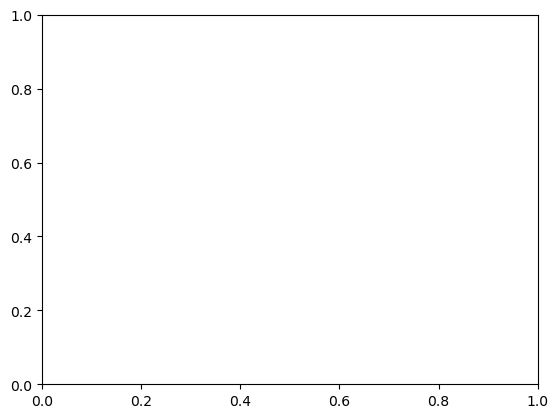

In [6]:


y_pred = regressor.predict(X)

plt.scatter(X, y,c=df["N_level"],cmap='viridis')
plt.plot(X, y_pred,color='k')



plt.show()


In [7]:
from scipy import stats

# Assuming y_train is your data
z_scores = np.abs(stats.zscore(y_train ))

threshold = 3
outliers = np.where(z_scores > threshold)

print(f'Outlier indices: {outliers}')



Outlier indices: (array([ 43,  88,  92, 117, 205, 213, 249], dtype=int64), array([0, 0, 0, 0, 0, 0, 0], dtype=int64))


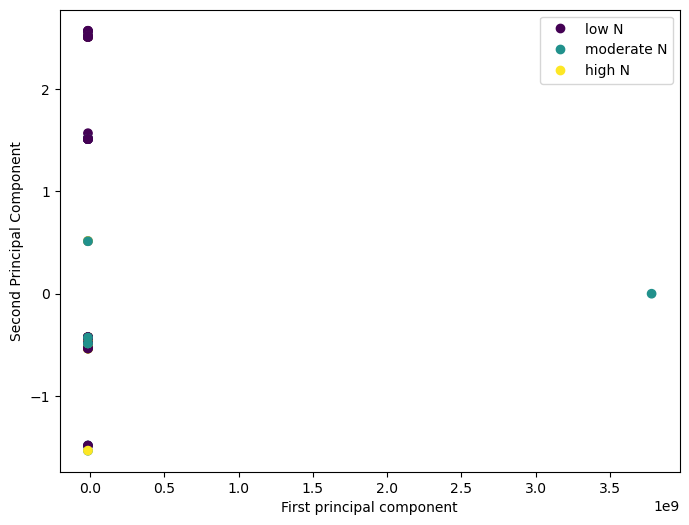

In [10]:
#PCA

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

X = df.drop('N', axis=1)
X = X.drop('N_level', axis=1)
X = X.drop('POINTID', axis=1)

# Replace infinities with nan Then replace nan with mean (or median, or mode)
Xd = np.where(np.isinf(X), np.nan, X)
Xd = np.where(np.isnan(Xd), np.nanmean(Xd), Xd)


y = df['N_level']
scaled_data = scaler.fit_transform(Xd)
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_data)  # Fit PCA on the scaled data
loadings_df = pd.DataFrame(pca.components_, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(Xd, y, test_size=0.3, random_state=3)

from sklearn.decomposition import PCA




X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train[:,0], X_train[:,1], c=y_train, label=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=['low N', 'moderate N', 'high N'])

plt.show()